In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
import sys
import copy
import statsmodels.api as sm
pd.options.mode.chained_assignment = None
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000
%matplotlib inline

dfTemp=pd.read_csv(r'C:\Users\Jaesung Park\Desktop\FP\GroupProject\final.csv',keep_default_na=False)

In [2]:
dataset = pd.get_dummies(dfTemp, drop_first=True)
dataset = dataset[dataset.columns.difference(['PID','Order','Total Bsmt SF'])]
# mix the dataset
dataset = dataset.reindex(np.random.permutation(dataset.index))


five = [] # 4 in. 5 percent
for i in range(len(dataset.columns)):
    if dataset.columns[i] not in ([ 'Exterior 1st_HdBoard',
       'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_VinylSd',
       'Exterior 1st_Wd Sdng', 'Exterior 1st_other','Lot Area','Mo Sold','Yr Sold']):
        five.append(dataset.columns[i])


fifthteen = [] # 12 in. 15 percent
for i in range(len(dataset.columns)):
    if dataset.columns[i] not in (['Exterior 1st_HdBoard',
       'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_VinylSd',
       'Exterior 1st_Wd Sdng', 'Exterior 1st_other','Lot Area','Mo Sold','Yr Sold','Pool Area','Year Remod/Add','Bedroom AbvGr', 'Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'Bldg Type_TwnhsE', 'Bldg Type_other','Fireplaces', 'House Style_1Story', 'House Style_2Story', 'House Style_SLvl',
       'House Style_other', 'Sale Condition_Normal', 'Sale Condition_Partial',
       'Sale Condition_other','Roof Style_Hip',
       'Roof Style_other']):
        fifthteen.append(dataset.columns[i])
        
thirty = [] # 24 in. 30 percent
for i in range(len(dataset.columns)):
    if dataset.columns[i] not in (['Exterior 1st_HdBoard',
       'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_VinylSd',
       'Exterior 1st_Wd Sdng', 'Exterior 1st_other','Lot Area','Mo Sold','Yr Sold','Pool Area','Year Remod/Add','Bedroom AbvGr', 'Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'Bldg Type_TwnhsE', 'Bldg Type_other','Fireplaces', 'House Style_1Story', 'House Style_2Story', 'House Style_SLvl',
       'House Style_other', 'Sale Condition_Normal', 'Sale Condition_Partial',
       'Sale Condition_other','Roof Style_Hip','Roof Matl_other',
       'Roof Style_other',  'Exter Cond_TA', 'Exter Cond_other', 'Exter Qual_Gd',
       'Exter Qual_TA', 'Exter Qual_other', 'Heating QC_Gd',
       'Heating QC_TA', 'Heating QC_other', 'Heating_other',
     'Paved Drive_Y','Paved Drive_other', 'BsmtFin Type 2_Rec',
       'BsmtFin Type 2_Unf', 'BsmtFin Type 2_other', '1st Flr SF', 'Land Slope_Mod', 'Land Slope_Sev', 'Lot Config_CulDSac', 'Lot Config_Inside', 'Lot Config_other',
      'Foundation_CBlock', 'Foundation_PConc', 'Foundation_other', 'MS SubClass_160', 'MS SubClass_20', 'MS SubClass_30', 'MS SubClass_50',
       'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_other', 'Low Qual Fin SF'
]):
        thirty.append(dataset.columns[i])
        
half = [] # 반타작 39
for i in range(len(dataset.columns)):
       if dataset.columns[i] not in (['Exterior 1st_HdBoard',
       'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_VinylSd',
       'Exterior 1st_Wd Sdng', 'Exterior 1st_other','Lot Area','Mo Sold','Yr Sold',
        'Pool Area','Year Remod/Add','Bedroom AbvGr', 'Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'Bldg Type_TwnhsE', 'Bldg Type_other','Fireplaces', 'House Style_1Story',
        'House Style_2Story', 'House Style_SLvl',
       'House Style_other', 'Sale Condition_Normal', 'Sale Condition_Partial',
       'Sale Condition_other','Roof Style_Hip','Roof Matl_other',
       'Roof Style_other',  'Exter Cond_TA', 'Exter Cond_other', 'Exter Qual_Gd',
       'Exter Qual_TA', 'Exter Qual_other', 'Heating QC_Gd',
       'Heating QC_TA', 'Heating QC_other', 'Heating_other',
     'Paved Drive_Y','Paved Drive_other', 'BsmtFin Type 2_Rec',
       'BsmtFin Type 2_Unf', 'BsmtFin Type 2_other', '1st Flr SF', 'Land Slope_Mod', 
        'Land Slope_Sev', 'Lot Config_CulDSac', 'Lot Config_Inside', 'Lot Config_other',
      'Foundation_CBlock', 'Foundation_PConc', 'Foundation_other', 'MS SubClass_160', 
        'MS SubClass_20', 'MS SubClass_30', 'MS SubClass_50',
       'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_other', 'Low Qual Fin SF',
        'Mas Vnr Area', 'Mas Vnr Type_None',
       'Mas Vnr Type_Stone', 'Mas Vnr Type_other', 'Neighborhood_CollgCr', 
    'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_other','Open Porch SF',
         'Garage Yr Blt', 'Gr Liv Area', 'Half Bath','Kitchen AbvGr', 'Kitchen Qual_TA',
       'Kitchen Qual_other', 'Land Contour_HLS', 'Land Contour_Low',
       'Land Contour_Lvl','Year Built']):
        half.append(dataset.columns[i])  
        
seventy = [] # 55 in. 70 percent
for i in range(len(dataset.columns)):
    if dataset.columns[i] in (['Misc Val', 'Overall Qual', 'Utilities_other', 'Wood Deck SF', 'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_other',
       'Condition 2_other', 'Electrical_SBrkr', 'Electrical_other',
       'Enclosed Porch', 'Exterior 2nd_HdBoard',
      'Full Bath', 'Fence_other',
       'Fireplace Qu_TA', 'Fireplace Qu_other', 'MS Zoning_RM',
       'MS Zoning_other', '2nd Flr SF', '3Ssn Porch', 'Alley_other','BsmtFin SF 1','BsmtFin SF 2',
        'Bsmt Cond_Gd', 'Bsmt Cond_TA',
       'Bsmt Cond_other', 'Bsmt Exposure_Gd', 'Bsmt Exposure_Mn',
       'Bsmt Exposure_No', 'Bsmt Exposure_other', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual_Gd', 'Bsmt Qual_TA', 'Bsmt Qual_other',
       'Bsmt Unf SF', 'Sale Type_other']):
        seventy.append(dataset.columns[i])
        
eightyfive = [] # 67 in. 85 percent
for i in range(len(dataset.columns)):
     if dataset.columns[i] in ([ 'Misc Val', 'Overall Qual', 'Utilities_other', 'Wood Deck SF', 'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_other',
       'Condition 2_other', 'Electrical_SBrkr', 'Electrical_other',
       'Enclosed Porch', 'Exterior 2nd_HdBoard',
      'Full Bath', 'Fence_other','Sale Type_other']):
            eightyfive.append(dataset.columns[i])
        
ninetyfive = [] # 74 in. 95 percent
for i in range(len(dataset.columns)):
    if dataset.columns[i] in ([  'Misc Val','Overall Qual', 'Utilities_other','Sale Type_other']):
        ninetyfive.append(dataset.columns[i])
        




In [3]:
testing = dataset
# linear Regression


In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



<module 'matplotlib.pyplot' from 'c:\\users\\jaesung park\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

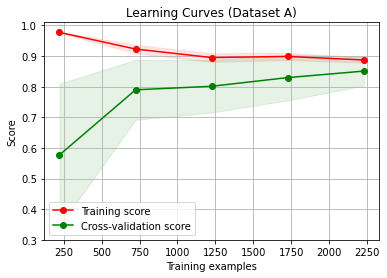

In [13]:
X = testing[testing.columns.difference(['SalePrice'])]
y = testing['SalePrice']
estimator = LinearRegression(fit_intercept=True)
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
title = "Learning Curves (Dataset A)"
plot_learning_curve(estimator, title, X, y, ylim=(0.3, 1.01), cv=cv, n_jobs=1)